In this notebook, I calculate the confidence intervals for the parameters of the exponential and normal distributions make some notes on it.

In [9]:
import numpy as np
from scipy.stats import chi2, expon, norm, t, sem
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 5)

# Confidence interval for exponential distribution

In [2]:
#For graphs
sns.set_style('whitegrid')
x = np.linspace(-10, 10, 1000)

In [3]:
# Parameter
Lambda = 2

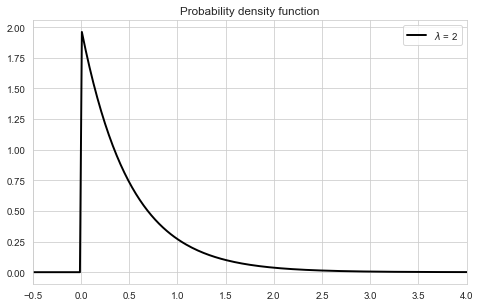

In [15]:
y = expon.pdf(x, scale = 1/Lambda)
plt.plot(x, y, color = 'black', linewidth = 2, label = f'$\lambda$ = {Lambda}')
plt.xlim(-0.5, 4)
plt.legend()
plt.title('Probability density function');

To build confidence interval for exponential parameter we are using statistics $T = 2\lambda n \overline{X}$ that converges to $\sim \chi^2(2n)$ when $n$ is big enough. So, confidence interval for $\lambda$ will be 

$$\left(\dfrac{\chi^2_{\frac{1 -\alpha}{2}}(2n)}{2n\overline{X}}, \dfrac{\chi^2_{\frac{1 + \alpha}{2}}(2n)}{2n\overline{X}}\right)$$

Lets calculate it for different sample sizes $N$

In [14]:
# Different sample sizes
N = [10, 1000, 10000, 1000000]
# Confindence level
alpha = 0.95
for n in N:
    X = np.random.exponential(scale = 1 / Lambda, size = n)
    print(
        f'Confidence interval for sample size = {n}:\n',
        f'({chi2.ppf((1 - alpha)/2, df = 2 * n)/(2 * n * X.mean())}, {chi2.ppf((1 + alpha) / 2, df = 2 * n)/(2 * n *X.mean())})\n',
        tuple(chi2.interval(alpha = alpha, df = 2 * n) / (2 * n * X.mean())))

Confidence interval for sample size = 10:
 (1.4272106328119452, 5.084804317329578)
 (1.4272106328119452, 5.084804317329578)
Confidence interval for sample size = 1000:
 (1.9034853637624212, 2.154752921038243)
 (1.9034853637624212, 2.154752921038243)
Confidence interval for sample size = 10000:
 (1.9721978307085528, 2.0510437571499582)
 (1.9721978307085528, 2.0510437571499582)
Confidence interval for sample size = 1000000:
 (1.993343513266876, 2.0011726129075837)
 (1.993343513266876, 2.0011726129075837)


Above cell shows that both chi2.ppf and chi2.interval can be used to construct interval. Also, as expected, the larger sample we use, the smaller interval we get.

P.S. I tried my best to make that print readable

# Confidence interval for the mean of normal distribution when variance is known

In this case statistics $T = \dfrac{X_m - \mu}{\sigma}\sqrt n \sim N(0, 1)$. Hence we get the following interval for the mean: $\left(\overline{X} - \dfrac{\sigma}{\sqrt n} u_{\frac{1 + \alpha}{2}}, \overline{X} + \dfrac{\sigma}{\sqrt n} u_{\frac{1 + \alpha}{2}}\right)$, where $\sigma$ is our variance and $u_a$ - $a$  quantile of the normal distribution.

In [17]:
# Setting parameters
Mu = 2.5
sigma = 2

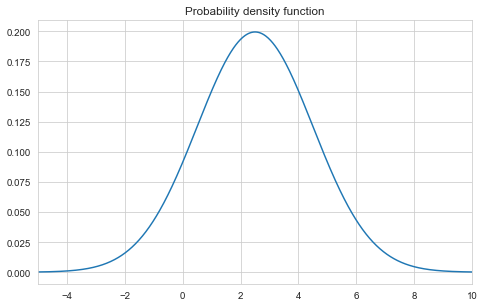

In [18]:
# Some ploting
y = norm.pdf(x, loc = Mu, scale = sigma)
plt.plot(x, y)
plt.xlim(-5, 10)
plt.title('Probability density function');

In [19]:
alpha = 0.95
for n in N:
    X = np.random.normal(loc = Mu, size = n, scale = sigma)
    print(
        f'Confidence interval for sample size = {n}:\n',
        f'({X.mean() - sigma * norm.ppf((1 + alpha) / 2) / n ** 0.5}, {X.mean() + sigma * norm.ppf((1 + alpha) / 2) / n ** 0.5})\n', 
        norm.interval(alpha = alpha, loc = np.mean(X), scale = sigma / n ** 0.5))

Confidence interval for sample size = 10:
 (0.598332523758268, 3.077512652976514)
 (0.598332523758268, 3.077512652976514)
Confidence interval for sample size = 1000:
 (2.204131666838711, 2.452049679760536)
 (2.204131666838711, 2.452049679760536)
Confidence interval for sample size = 10000:
 (2.4792643550170843, 2.5576629143986866)
 (2.4792643550170843, 2.5576629143986866)
Confidence interval for sample size = 1000000:
 (2.4967863793312177, 2.5046262352693778)
 (2.4967863793312177, 2.5046262352693778)


Note that in scale parameter of norm.interval function we have to use Standart Error of Mean instead of variance.

# Confidence interval for the mean of normal distribution when variance is unknown

Statistics $T = \dfrac{\overline{X} - \mu}{S}\sqrt n \sim t(n-1)$. Confidence interval: $\left(\overline{X}-\frac{S}{\sqrt{n}} t_{\frac{1 + \alpha}{2}}(n-1),  \overline{X}+\frac{S}{\sqrt{n}} t_{\frac{1 + \alpha}{2}}(n-1)\right)$

In [21]:
alpha = 0.95
for n in N:
    X = np.random.normal(loc = Mu, size = n, scale = sigma)
    print(
        f'Confidence interval for sample size = {n}:\n',
        f'({X.mean() - X.std(ddof = 1)*t.ppf((1 + alpha) / 2, df = n - 1) / n ** 0.5},',
        f'{X.mean() + X.std(ddof = 1) * t.ppf((1 + alpha) / 2, df = n - 1) / n ** 0.5})\n',
        t.interval(alpha = alpha, df = n - 1, loc = X.mean(), scale = sem(X)))

Confidence interval for sample size = 10:
 (0.897808081942157, 3.755066947770793)
 (0.897808081942157, 3.755066947770793)
Confidence interval for sample size = 1000:
 (2.336455619587753, 2.5844358686660756)
 (2.336455619587753, 2.5844358686660756)
Confidence interval for sample size = 10000:
 (2.45262398677905, 2.530580805511041)
 (2.45262398677905, 2.530580805511041)
Confidence interval for sample size = 1000000:
 (2.49953716288216, 2.5073802241839567)
 (2.49953716288216, 2.5073802241839567)


In most cases, the population variance is unknown, and in practice the above interval is used more often.

# Confidence interval for standard derivation of normal distribution

Statistics $T = \dfrac{\overline{X} - \mu}{S}\sqrt n \sim \chi^2(n-1)$. Confidence interval: $\left( \frac{S \sqrt{n-1}}{\sqrt{\chi_{\frac{1 + \alpha}{2}}^{2}(n-1)}}; \frac{S\sqrt{n-1}}{\sqrt{\chi_{\frac{1 - \alpha}{2}}^{2}(n-1)}} \right)$

In [23]:
alpla = 0.95
for n in N:
    print(
        f'Confidence interval for sample size = {n}:\t'
        f'({X.std(ddof = 1) * (n - 1) ** 0.5 / chi2.ppf((1 + alpha) / 2, df = n - 1) ** 0.5}', 
        f'{X.std(ddof = 1) * (n - 1) ** 0.5 / chi2.ppf((1 - alpha) / 2, df = n - 1) ** 0.5})')

Confidence interval for sample size = 10:	(1.3762311973632777 3.6527087633133264)
Confidence interval for sample size = 1000:	(1.91680575432721 2.0925833963847817)
Confidence interval for sample size = 10000:	(1.973466619129363 2.0289380450583305)
Confidence interval for sample size = 1000000:	(1.9980462136827783 2.003592101473741)


This should be all the most common confidence intervals, as most real values have a normal distribution (or can be transformed into ones), and the waiting time is often distributed exponentially.